##Import Library



In [ ]:
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

plt.style.use("fivethirtyeight")

##1. Data Loading dan Exploration

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/Departemen Marketing/marketing.csv')
df.head()

,id_,age,gender,city,country,traffic_source,user_id,browser,event_type
0,99814,29,M,Taizhou,China,Search,99814,Firefox,cart
1,13645,52,F,Tokyo,Japan,Search,13645,Chrome,cart
2,19830,49,M,Oeiras do Pará,Brasil,Facebook,19830,Chrome,cart
3,20489,44,M,Chaozhou,China,Organic,20489,Safari,cart
4,20808,58,M,Freyming-Merlebach,France,Search,20808,Chrome,cart


In [ ]:
df.tail()

,id_,age,gender,city,country,traffic_source,user_id,browser,event_type
1293231,3830,50,F,Seoul,South Korea,Display,3830,Safari,cart
1293232,7081,37,M,Zhangye,China,Search,7081,Firefox,cart
1293233,95328,12,F,Valdosta,United States,Search,95328,Chrome,cart
1293234,95701,65,M,Surubim,Brasil,Search,95701,Chrome,cart
1293235,96862,12,F,Hoover,United States,Search,96862,Other,cart


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293236 entries, 0 to 1293235
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id_             1293236 non-null  int64 
 1   age             1293236 non-null  int64 
 2   gender          1293236 non-null  object
 3   city            1280366 non-null  object
 4   country         1293236 non-null  object
 5   traffic_source  1293236 non-null  object
 6   user_id         1293236 non-null  int64 
 7   browser         1293236 non-null  object
 8   event_type      1293236 non-null  object
dtypes: int64(3), object(6)
memory usage: 88.8+ MB


In [ ]:
# Melihat ukuran dataset
df.shape

(1293236, 9)

In [ ]:
df.describe()

,id_,age,user_id
count,1.293236e+06,1.293236e+06,1.293236e+06
mean,5.027344e+04,4.114773e+01,5.027344e+04
std,2.888424e+04,1.699898e+01,2.888424e+04
min,1.000000e+00,1.200000e+01,1.000000e+00
25%,2.533600e+04,2.600000e+01,2.533600e+04
50%,5.041300e+04,4.100000e+01,5.041300e+04
75%,7.537625e+04,5.600000e+01,7.537625e+04
max,1.000000e+05,7.000000e+01,1.000000e+05


###Melihat Unique Data

In [ ]:
# age
df.age.unique()

array([29, 52, 49, 44, 58, 19, 59, 39, 53, 13, 37, 26, 43, 42, 22, 18, 60,
       57, 12, 56, 50, 46, 32, 67, 64, 45, 16, 35, 65, 15, 23, 38, 48, 30,
       17, 25, 40, 27, 61, 36, 47, 54, 70, 63, 21, 68, 41, 31, 34, 62, 28,
       51, 20, 24, 69, 14, 55, 33, 66])

In [ ]:
# gender
df.gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
# city
df.city.unique()

array(['Taizhou', 'Tokyo', 'Oeiras do Pará', ..., 'Farciennes', 'Tomago',
       'Alginet'], dtype=object)

In [ ]:
# country
df.country.unique()

array(['China', 'Japan', 'Brasil', 'France', 'United States', 'Spain',
       'United Kingdom', 'Poland', 'Australia', 'South Korea', 'Germany',
       'Belgium', 'España', 'Colombia', 'Austria'], dtype=object)

In [ ]:
# traffic_source
df.traffic_source.unique()

array(['Search', 'Facebook', 'Organic', 'Display', 'Email'], dtype=object)

In [ ]:
# browser
df.browser.unique()

array(['Firefox', 'Chrome', 'Safari', 'IE', 'Other'], dtype=object)

In [ ]:
# event_type
df.event_type.unique()

array(['cart', 'purchase', 'department', 'product', 'home'], dtype=object)

###Correlation

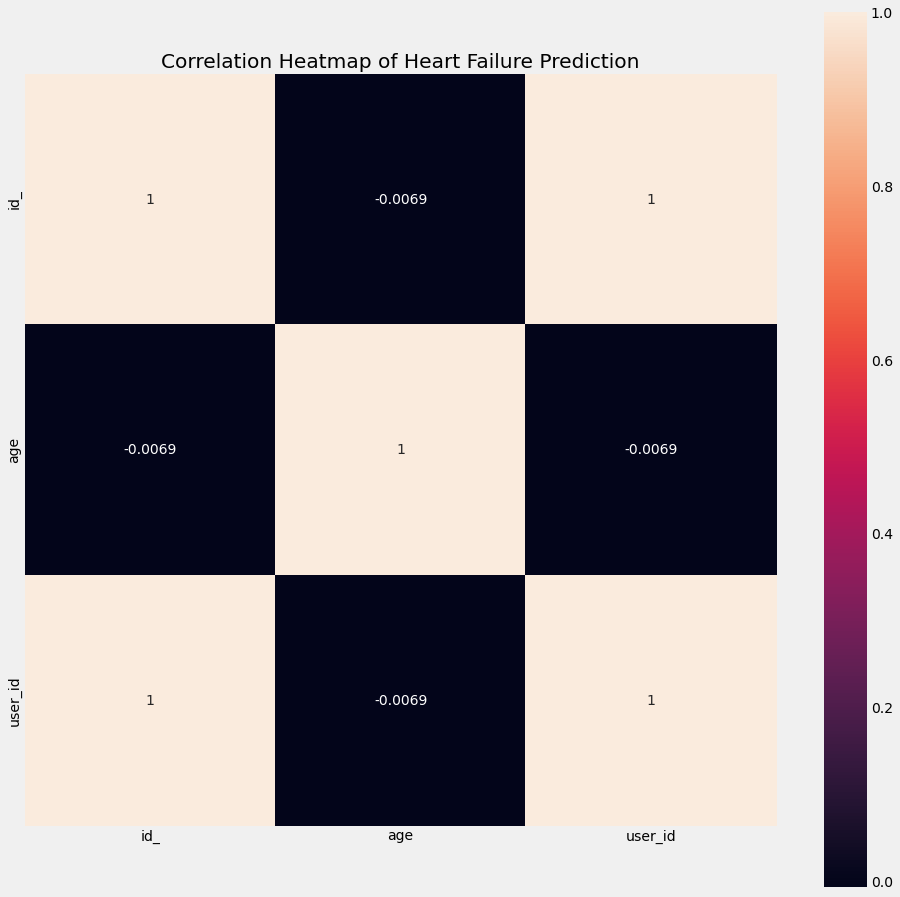

In [ ]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction')
fig.set_size_inches((15,15))
sns.heatmap(df.corr(), square = True, annot = True)

###Visualisasi

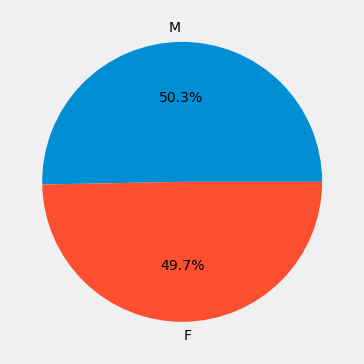

In [ ]:
#gender
fig = plt.figure(figsize=(6,6))
gender=['M','F']
plt.pie(df['gender'].value_counts(),labels=gender,autopct='%1.1f%%')
plt.show()

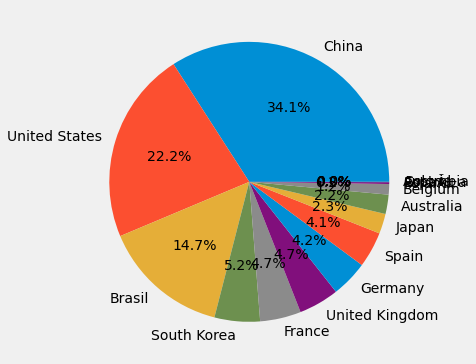

In [ ]:
##country
fig = plt.figure(figsize=(6,6))
country=['China', 'United States', 'Brasil',  'South Korea',  'France', 'United Kingdom', 'Germany', 'Spain',  'Japan', 'Australia',  'Belgium',  'Poland', 'Colombia',  'Austria', 'EspaÃ±a']
plt.pie(df['country'].value_counts(),labels=country,autopct='%1.1f%%')
plt.show()

In [ ]:
df['country'].value_counts()

China             441076
United States     287430
Brasil            189601
South Korea        67876
United Kingdom     61167
France             60198
Germany            54895
Spain              53412
Japan              29847
Australia          28803
Belgium            15735
Poland              2725
Colombia             326
España               101
Austria               44
Name: country, dtype: int64

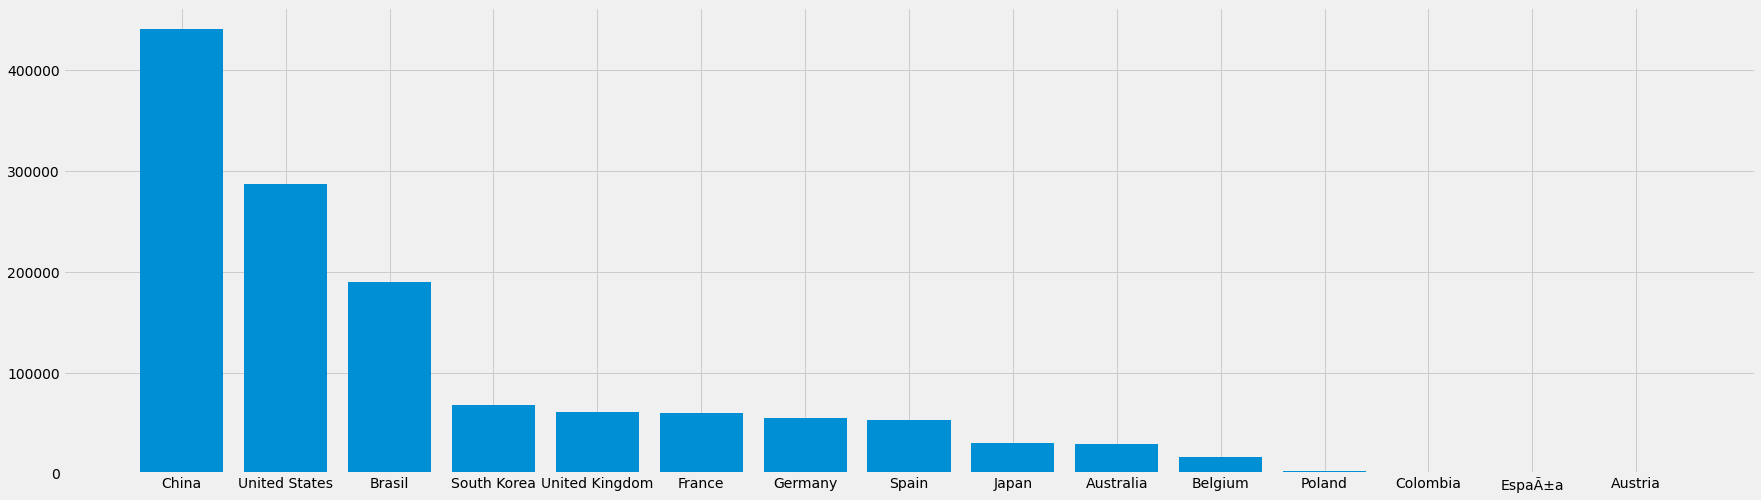

In [ ]:
fig = plt.figure(figsize=(27,8))
country=['China', 'United States', 'Brasil',  'South Korea',  'United Kingdom', 'France', 'Germany', 'Spain',  'Japan', 'Australia',  'Belgium',  'Poland', 'Colombia',  'EspaÃ±a', 'Austria']
number=[ 441076 , 287430, 189601,  67876 , 61167 , 60198 , 54895 , 53412 , 29847 , 28803 , 15735, 2725 , 326 , 101, 44 ]
plt.bar(country,number)
plt.show()

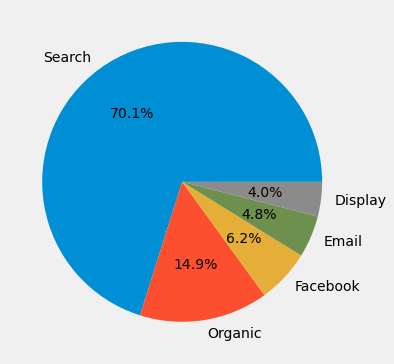

In [ ]:
##traffic_source
fig = plt.figure(figsize=(6,6))
ts=['Search', 'Organic','Facebook','Email','Display']
plt.pie(df['traffic_source'].value_counts(),labels=ts,autopct='%1.1f%%')
plt.show()

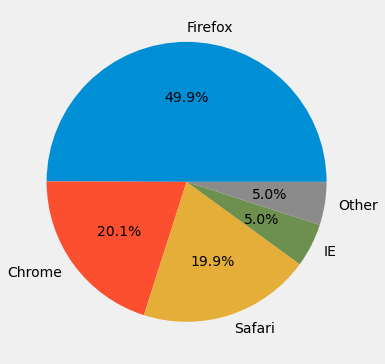

In [ ]:
#browser
fig = plt.figure(figsize=(6,6))
ts=['Firefox', 'Chrome', 'Safari', 'IE', 'Other']
plt.pie(df['browser'].value_counts(),labels=ts,autopct='%1.1f%%')
plt.show()

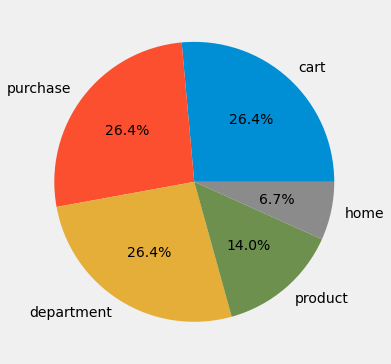

In [ ]:
##event_type
fig = plt.figure(figsize=(6,6))
ts=['cart', 'purchase', 'department', 'product', 'home']
plt.pie(df['event_type'].value_counts(),labels=ts,autopct='%1.1f%%')
plt.show()

##2. Data Cleaning

###Melihat Missing Value

In [ ]:
df.isnull()

,id_,age,gender,city,country,traffic_source,user_id,browser,event_type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1293231,False,False,False,False,False,False,False,False,False
1293232,False,False,False,False,False,False,False,False,False
1293233,False,False,False,False,False,False,False,False,False
1293234,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

id_                   0
age                   0
gender                0
city              12870
country               0
traffic_source        0
user_id               0
browser               0
event_type            0
dtype: int64

In [ ]:
df.isnull().sum().sum()

12870

In [ ]:
#Handling Missing Value
df.dropna(inplace=True)

In [ ]:
df.isna().any()

id_               False
age               False
gender            False
city              False
country           False
traffic_source    False
user_id           False
browser           False
event_type        False
dtype: bool

In [ ]:
#Cek missing value setelah handling
df.isnull().sum()

id_               0
age               0
gender            0
city              0
country           0
traffic_source    0
user_id           0
browser           0
event_type        0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

###Melihat Duplicate

In [ ]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1293231     True
1293232     True
1293233     True
1293234     True
1293235     True
Length: 1280366, dtype: bool

In [ ]:
df.duplicated().sum()

685454

In [ ]:
##Handling duplicate data
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1277736    False
1277737    False
1277742    False
1277744    False
1277748    False
Length: 594912, dtype: bool

In [ ]:
#Cek duplicate data setelah handling
df.duplicated().sum()

0

###Melihat Outlier

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


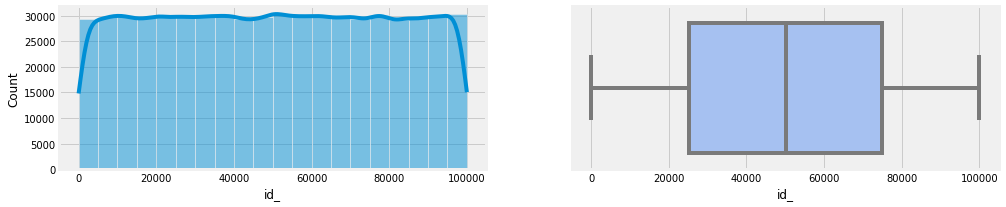

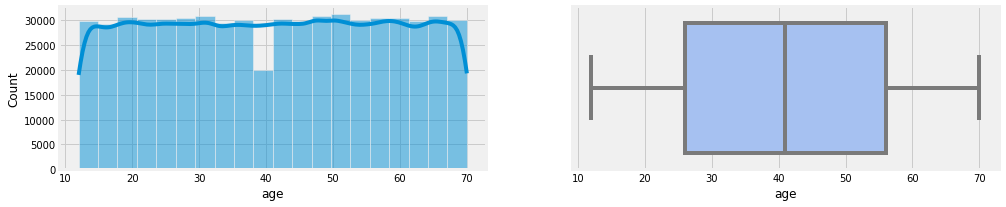

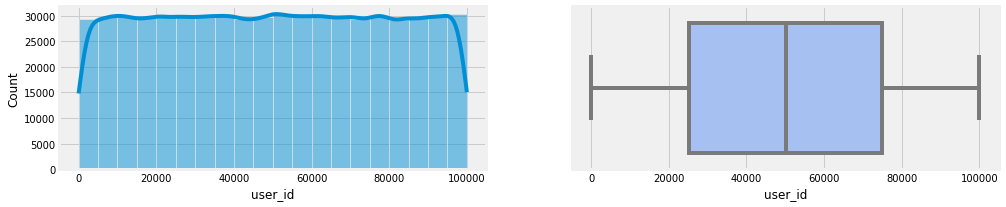

In [ ]:
num_col = ["id_","age","user_id"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Karena data tidak terdapat outlier maka tidak dilakukan handling dan dapat dilihat bahwa data berdistribusi normal

## 3. Data Preparation

In [ ]:
#Mengeluarkan data yang tidak dipakai
data=df.drop(columns=['city', 'user_id'])
data

,id_,age,gender,country,traffic_source,browser,event_type
0,99814,29,M,China,Search,Firefox,cart
1,13645,52,F,Japan,Search,Chrome,cart
2,19830,49,M,Brasil,Facebook,Chrome,cart
3,20489,44,M,China,Organic,Safari,cart
4,20808,58,M,France,Search,Chrome,cart
...,...,...,...,...,...,...,...
1277736,69741,41,F,Germany,Search,Firefox,purchase
1277737,85098,68,M,China,Search,Safari,purchase
1277742,97718,47,M,United States,Search,Chrome,purchase
1277744,49049,44,F,China,Search,Safari,purchase


In [ ]:
#Label data
cleanup_nums={"gender":{"M":0,"F":1},
              "country":{"China":0, "Japan":1, "Brasil":2, "France":3, "United States":4, "Spain":5,"United Kingdom":6, "Poland":7, "Australia":8, "South Korea":9, "Germany":10,"Belgium":11, "España":12, "Colombia":13, "Austria":14},
              "browser":{"Firefox":0, "Chrome":1, "Safari":2, "IE":3, "Other":4},
              "event_type":{"cart":0, "purchase":1, "department":2, "product":3, "home":4},
              "traffic_source":{"Search":0, "Organic":1,"Facebook":2,"Email":3,"Display":4}}

databaru=data.replace(cleanup_nums)
databaru

,id_,age,gender,country,traffic_source,browser,event_type
0,99814,29,0,0,0,0,0
1,13645,52,1,1,0,1,0
2,19830,49,0,2,2,1,0
3,20489,44,0,0,1,2,0
4,20808,58,0,3,0,1,0
...,...,...,...,...,...,...,...
1277736,69741,41,1,10,0,0,1
1277737,85098,68,0,0,0,2,1
1277742,97718,47,0,4,0,1,1
1277744,49049,44,1,0,0,2,1


In [ ]:
#Memisahkan data Y dan data X
art_data = databaru.drop(columns='traffic_source')
art_data.head()

,id_,age,gender,country,browser,event_type
0,99814,29,0,0,0,0
1,13645,52,1,1,1,0
2,19830,49,0,2,1,0
3,20489,44,0,0,2,0
4,20808,58,0,3,1,0


In [ ]:
#Membuat data Y
cls_data = databaru['traffic_source']
cls_data.head()

0    0
1    0
2    2
3    1
4    0
Name: traffic_source, dtype: int64

##4. Data Splitting dan Modeling

###Model Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(art_data, cls_data, test_size=0.3, random_state=500)
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
ypred=classifier.predict(xtest)

In [ ]:
#Evaluasi Model Naive Bayes
print(f'The accuracy score of Naive Bayes: {round(accuracy_score(ytest, ypred) * 100, 2)}%')

The accuracy score of Naive Bayes: 70.09%


###Model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(art_data, cls_data, test_size=0.3, random_state=500)
tree_data = DecisionTreeClassifier(random_state=500)
tree_data.fit(xtrain, ytrain) 

DecisionTreeClassifier(random_state=500)

In [ ]:
ypred=tree_data.predict(xtest)

In [ ]:
#Evaluasi Model Desicion Tree
print(f'The accuracy score of decision tree: {round(accuracy_score(ytest, ypred) * 100, 2)}%')

The accuracy score of decision tree: 99.42%


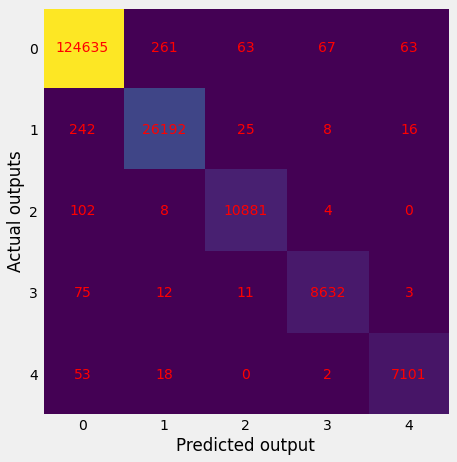

In [ ]:
# confusion matrix
cm = confusion_matrix(ytest, ypred)

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted output')
ax.set_ylabel('Actual outputs')
ax.xaxis.set(ticks=range(5))
ax.yaxis.set(ticks=range(5))
ax.set_ylim(4.5,-0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

Model terbaik yang digunakan adalah Model Decision Tree dengan akurasi sebesar 99,42%

### Model KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

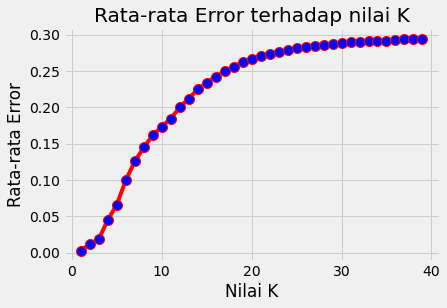

In [ ]:
#Mencari Nilai K
error=[]
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)

  pred_i = knn.predict(xtest)
  error.append(np.mean(pred_i != ytest))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Rata-rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-rata Error')
plt.show()

Dapat dilihat nilai K dengan error terkecil berada disekitar 5 jadi K yang digunakan 5

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(art_data, cls_data, test_size=0.3, random_state=500)
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
ypred=KNN.predict(xtest)

In [ ]:
print(f'The accuracy score of knn: {round(accuracy_score(ytest, ypred) * 100, 2)}%')

The accuracy score of knn: 93.4%
